In [1]:
# import sys
# import os
# sys.path.append(os.path.abspath('..'))

# # Ki·ªÉm tra th·ª≠
# print(sys.path)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from prediction_models.train_models.DurationTrain import train_duration_prediction_model
from prediction_models.train_models.ImportanceTrain import train_importance_prediction_model
from prediction_models.train_models.StartTimeTrain2 import train_start_time_prediction_model_2
from utils.DataPreparation import used_data
from data_preprocessing import preprocess_data

from prediction_models.train_models.TypeTrain import train_type_prediction_model

In [3]:
used_data

StartTime                TaskID  DayOfWeek EndTime  \
0         6:45                  1542     Sunday    7:30   
1        13:00  02oKz4hI5fgvVaY7nZ7s     Monday   13:15   
2         9:30                  1054   Saturday   10:00   
3        13:30                   812  Wednesday   13:50   
4         7:00                   857     Friday    7:10   
...        ...                   ...        ...     ...   
1863      9:15                  1238  Wednesday   10:15   
1864     13:30                  1660     Monday   13:50   
1865      8:00                   427     Friday   10:00   
1866     18:30                   242   Saturday   21:30   
1867      9:15                   640     Friday   10:15   

                   TaskName      Importance       Type  \
0                  Exercise  Less Important   Personal   
1            coding session          Normal  Education   
2             Drive to work          Normal       Work   
3             Take a shower          Normal   Personal   
4                  Pack bag          Normal   Personal   
...                     ...             ...        ...   
1863        Clean the house          Normal   Personal   
1864          Call a friend          Normal   Personal   
1865  Attend a yoga retreat       Important   Personal   
1866         Attend a party  Less Important     Social   
1867    Meeting with client  Very Important       Work   

                            UserID  Duration  
0                            user1        45  
1     AcggWN6cpMNmEhlgSKPVUc1Ylq32        15  
2                            user1        30  
3                            user1        20  
4                            user1        10  
...                            ...       ...  
1863                         user1        60  
1864                         user1        20  
1865                         user1       120  
1866                         user1       180  
1867                         user1        60  

[1868 rows x 9 columns]

üìä Th·ªëng k√™ m√¥ t·∫£:
count    1868.000000
mean       50.383298
std        35.508364
min         0.000000
25%        20.000000
50%        45.000000
75%        63.000000
max       240.000000
Name: Duration, dtype: float64


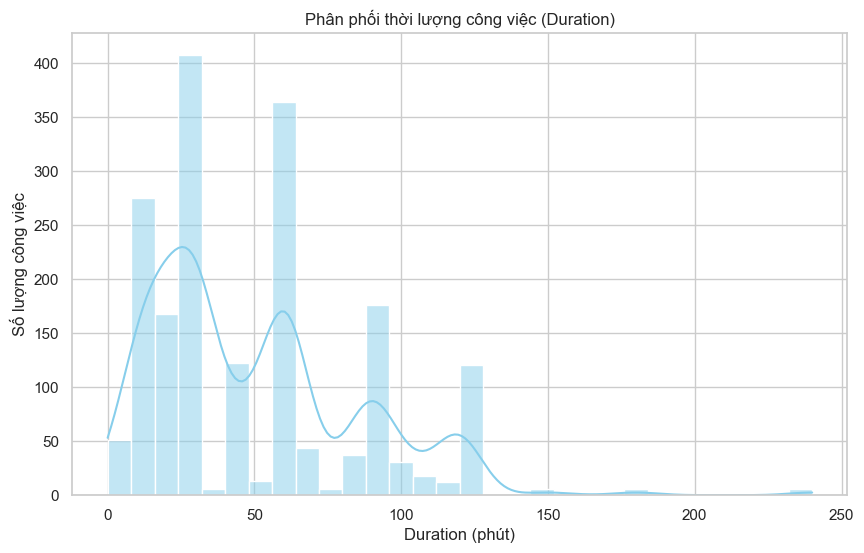

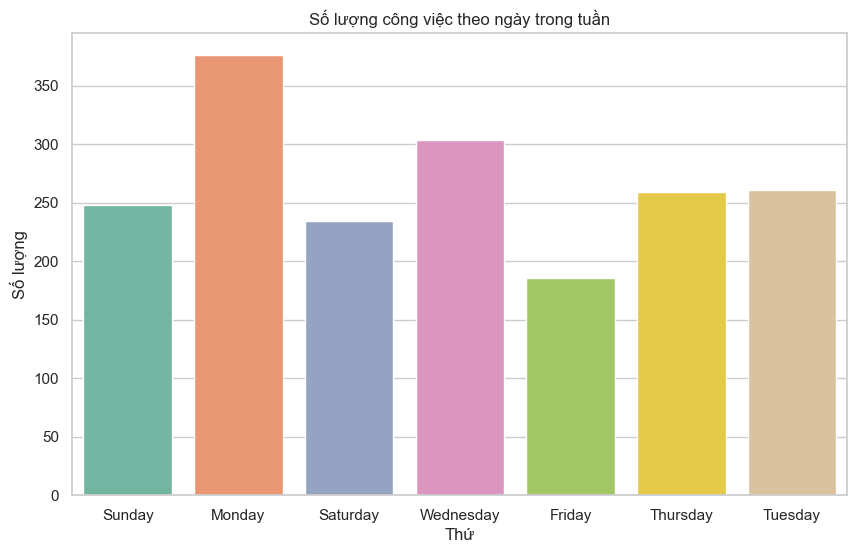

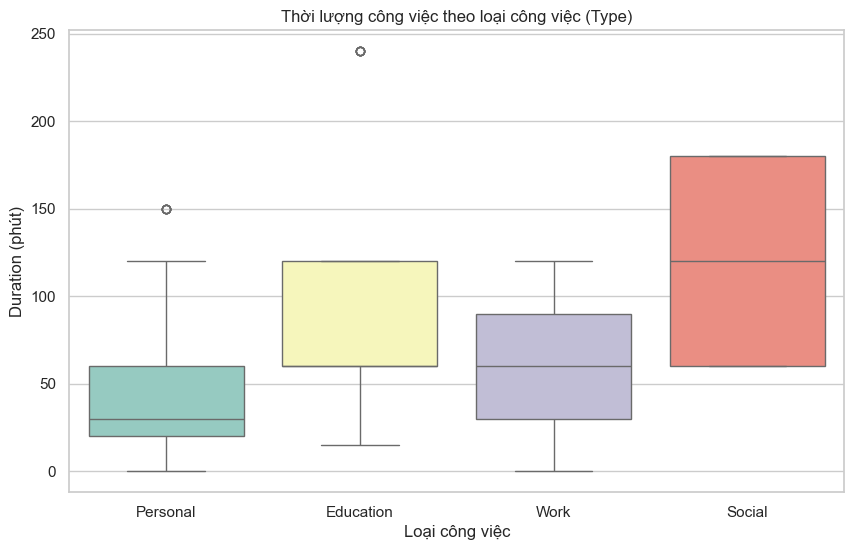

In [4]:
# C·∫•u h√¨nh ƒë·ªì h·ªça
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Th·ªëng k√™ m√¥ t·∫£ c√°c c·ªôt s·ªë
print("üìä Th·ªëng k√™ m√¥ t·∫£:")
print(used_data["Duration"].describe())

# 2. Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi Duration
plt.figure()
sns.histplot(used_data["Duration"], bins=30, kde=True, color="skyblue")
plt.title("Ph√¢n ph·ªëi th·ªùi l∆∞·ª£ng c√¥ng vi·ªác (Duration)")
plt.xlabel("Duration (ph√∫t)")
plt.ylabel("S·ªë l∆∞·ª£ng c√¥ng vi·ªác")
plt.show()

# 3. S·ªë l∆∞·ª£ng c√¥ng vi·ªác theo ng√†y trong tu·∫ßn
plt.figure()
sns.countplot(data=used_data, x="DayOfWeek", hue="DayOfWeek", palette="Set2", legend=False)
plt.title("S·ªë l∆∞·ª£ng c√¥ng vi·ªác theo ng√†y trong tu·∫ßn")
plt.xlabel("Th·ª©")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.show()

# 4. Duration trung b√¨nh theo Type
plt.figure()
sns.boxplot(data=used_data, x="Type", hue="Type", y="Duration", palette="Set3", legend=False)
plt.title("Th·ªùi l∆∞·ª£ng c√¥ng vi·ªác theo lo·∫°i c√¥ng vi·ªác (Type)")
plt.xlabel("Lo·∫°i c√¥ng vi·ªác")
plt.ylabel("Duration (ph√∫t)")
plt.show()

In [5]:
# √Åp d·ª•ng qu√° tr√¨nh ti·ªÅn x·ª≠ l√Ω cho d·ªØ li·ªáu
used_data, task_name_vectorized = preprocess_data(used_data)

used_data

B·∫Øt ƒë·∫ßu ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu...
Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu ban ƒë·∫ßu:
StartTime     0
TaskID        0
DayOfWeek     0
EndTime       0
TaskName      0
Importance    0
Type          0
UserID        0
Duration      0
dtype: int64
‚úÖ Ti·ªÅn x·ª≠ l√Ω ho√†n t·∫•t.


StartTime                TaskID  DayOfWeek EndTime             TaskName  \
0        06:45                  1542          3   07:30             exercise   
1        13:00  02oKz4hI5fgvVaY7nZ7s          1   13:15       coding session   
2        09:30                  1054          2   10:00           drive work   
3        13:30                   812          6   13:50          take shower   
4        07:00                   857          0   07:10             pack bag   
...        ...                   ...        ...     ...                  ...   
1855     09:15                  1238          6   10:15          clean house   
1856     13:30                  1660          1   13:50          call friend   
1857     08:00                   427          0   10:00  attend yoga retreat   
1858     18:30                   242          2   21:30         attend party   
1859     09:15                   640          0   10:15       meeting client   

      Importance  Type  UserID  Duration  StartTimeMinutes  
0              1     1       1        45               405  
1              2     0       0        15               780  
2              2     3       1        30               570  
3              2     1       1        20               810  
4              2     1       1        10               420  
...          ...   ...     ...       ...               ...  
1855           2     1       1        60               555  
1856           2     1       1        20               810  
1857           0     1       1       120               480  
1858           1     2       1       180              1110  
1859           3     3       1        60               555  

[1860 rows x 10 columns]

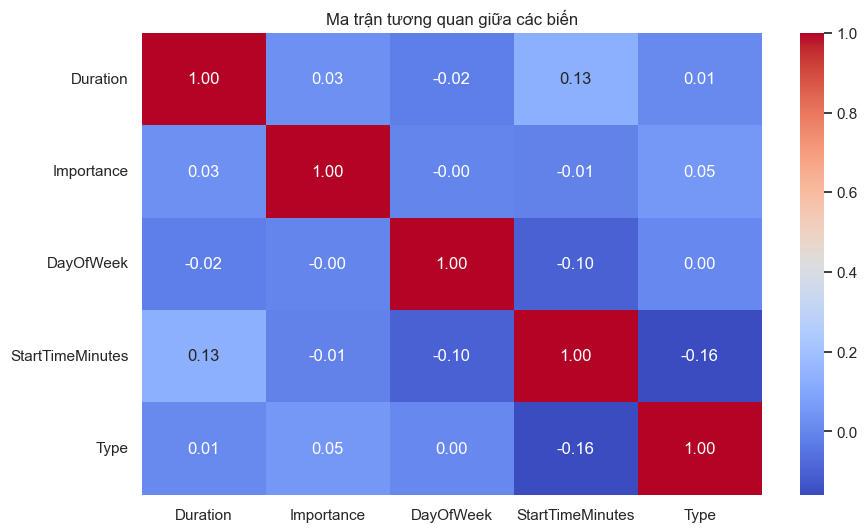

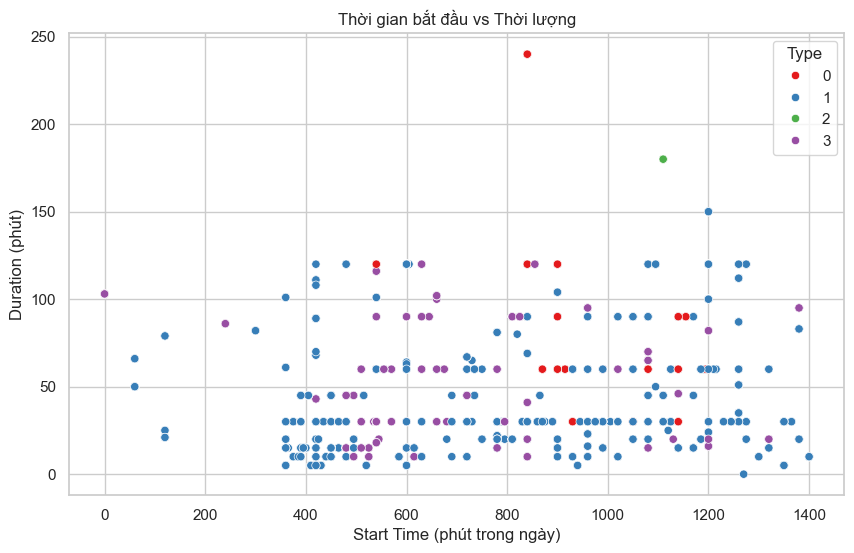

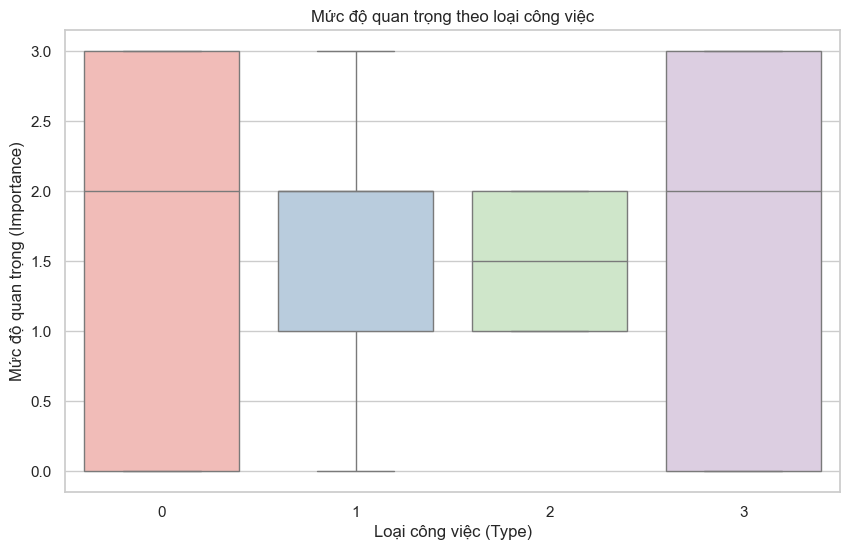

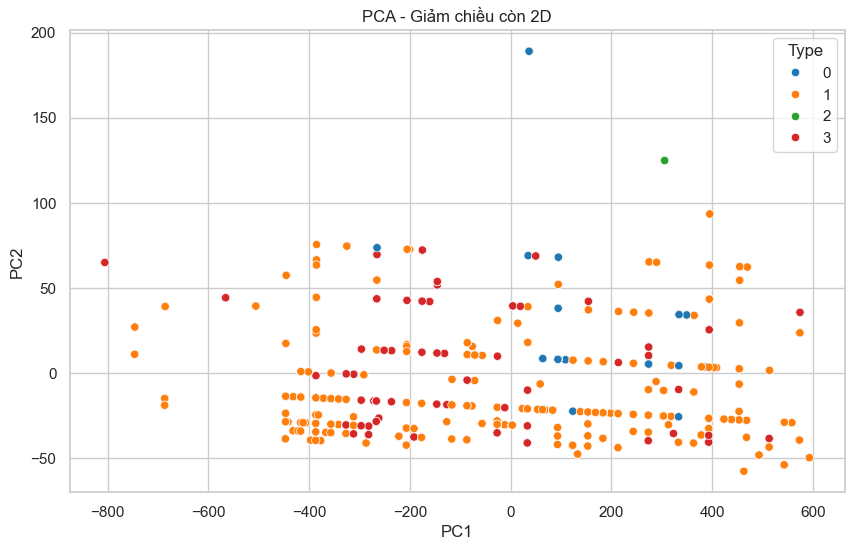

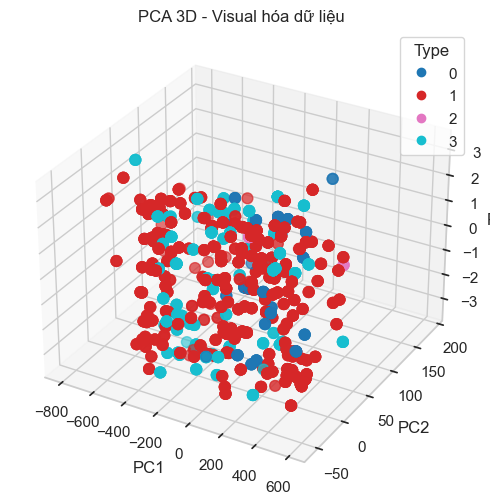

In [6]:
# 1. Heatmap bi·ªÉu th·ªã t∆∞∆°ng quan gi·ªØa c√°c c·ªôt s·ªë
plt.figure()
correlation = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn")
plt.show()

# 2. Scatter plot gi·ªØa Duration v√† StartTimeMinutes
plt.figure()
sns.scatterplot(data=used_data, x="StartTimeMinutes", y="Duration", hue="Type", palette="Set1")
plt.title("Th·ªùi gian b·∫Øt ƒë·∫ßu vs Th·ªùi l∆∞·ª£ng")
plt.xlabel("Start Time (ph√∫t trong ng√†y)")
plt.ylabel("Duration (ph√∫t)")
plt.show()

# 3. Boxplot: Importance theo Type
plt.figure()
sns.boxplot(data=used_data, x="Type", y="Importance", hue="Type", palette="Pastel1", legend=False)
plt.title("M·ª©c ƒë·ªô quan tr·ªçng theo lo·∫°i c√¥ng vi·ªác")
plt.xlabel("Lo·∫°i c√¥ng vi·ªác (Type)")
plt.ylabel("M·ª©c ƒë·ªô quan tr·ªçng (Importance)")
plt.show()


# √Åp d·ª•ng PCA l√™n c√°c c·ªôt s·ªë (ho·∫∑c d·ªØ li·ªáu vector h√≥a)
numerical_features = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type"]]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_features)

# Bi·ªÉu ƒë·ªì scatter plot 2D sau PCA
plt.figure()
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=used_data["Type"], palette="tab10")
plt.title("PCA - Gi·∫£m chi·ªÅu c√≤n 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# PCA 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(numerical_features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
    c=used_data["Type"], cmap="tab10", s=60
)
ax.set_title("PCA 3D - Visual h√≥a d·ªØ li·ªáu")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Type")
plt.show()

In [7]:
# Hu·∫•n luy·ªán v√† l∆∞u m√¥ h√¨nh
# TRAIN TYPE PREDICTION MODEL
# train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'], used_data_userid=used_data['UserID'])
train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'])

# TRAIN IMPORTANCE PREDICTION MODEL
# train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                   used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'])
train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
                                  used_data_importance=used_data['Importance'])

# TRAIN DURATION PREDICTION MODEL
# train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                 used_data_day_of_week=used_data['DayOfWeek'],
#                                 used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'], used_data_duration=used_data['Duration'])
train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
                                used_data_day_of_week=used_data['DayOfWeek'],
                                used_data_importance=used_data['Importance'], used_data_duration=used_data['Duration'])

#-------------------------
# def time_to_minutes(start_time):
#     hours, minutes = map(int, start_time.split(":"))
#     return hours * 60 + minutes
#
# used_data['StartTimeMinutes'] = used_data['StartTime'].apply(time_to_minutes)

# required_columns = used_data[['Type', 'Importance', 'DayOfWeek', 'UserID']]
required_columns = used_data[['Type', 'Importance', 'DayOfWeek']]

train_start_time_prediction_model_2(task_name_vectorized, required_columns=required_columns,
                                  start_time_minutes=used_data['StartTimeMinutes'])

-----type_prediction_model START TRAINNING.-----
Accuracy: 0.956989247311828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97       262
           2       1.00      1.00      1.00         2
           3       0.98      0.81      0.89        80

    accuracy                           0.96       372
   macro avg       0.98      0.95      0.97       372
weighted avg       0.96      0.96      0.96       372

type_prediction_model.pkl have been saved successfully.
-----importance_prediction_model START TRAINNING.-----
Accuracy: 0.8951612903225806
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        47
           1       0.88      0.83      0.86        71
           2       0.91      0.96      0.94       205
           3       0.94      0.69      0.80        49

    accuracy                           0.90       372
   macro avg       0.8